In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
TVA = pd.read_excel('VraiTVA.xlsx')
ERA = pd.read_excel('VraiERA.xlsx')
TVA = pd.read_excel('VraiTVA.xlsx')
ERA = pd.read_excel('VraiERA.xlsx')
jointure = pd.merge(ERA, TVA, on='BP', how='inner')
jointure.rename(columns={'Chiffre d’affaire (C.A)': 'ChAff'}, inplace=True)

In [3]:
jointure['featureChT'] =  jointure['ChAff']  - jointure['Total TVA anuelle'] 
print(jointure.head())

           BP                  Wilaya Code CNRC Code ONS       ChAff  \
0  2000000147           DIW Alger est    607047        /           0   
1  2000000200           DIW Alger est    608001        /    93115698   
2  2000007178  DIW Bordj Bou Arréridj    110202        /   155423274   
3  2000009570           DIW Alger est    405105        /  5798168362   
4  2000011509           DIW Alger est    409001        /  2062602782   

   Total TVA Janvier  Total TVA Février  Total TVA Mars  Total TVA Avril  \
0       4.381490e+09       4.710011e+09    5.358351e+09     4.811742e+09   
1       6.441810e+05       1.478702e+06    2.304256e+06     1.226741e+06   
2       4.872747e+06       4.275042e+06    3.918504e+06     6.082352e+06   
3       4.232086e+08       3.965581e+08    4.111293e+08     6.288660e+08   
4       1.607687e+08       2.937824e+08    3.321080e+08     1.234689e+08   

   Total TVA Mai  Total TVA Juin  Total TVA Juillet  Total TVA Août  \
0   4.835182e+09    4.467203e+09       

In [4]:
def estime(row):
    if row['ChAff'] == 0 or row['Total TVA anuelle'] ==0 :
        return 'sus'
    elif abs(row['featureChT']) > 1000:
        return 'fraude'
    else:
        return 'bon'

jointure['cible'] = jointure.apply(estime, axis=1)

In [5]:
print(jointure.columns)
jointure.to_excel('ghj.xlsx', index=False)

Index(['BP', 'Wilaya', 'Code CNRC', 'Code ONS', 'ChAff', 'Total TVA Janvier',
       'Total TVA Février', 'Total TVA Mars', 'Total TVA Avril',
       'Total TVA Mai', 'Total TVA Juin', 'Total TVA Juillet',
       'Total TVA Août', 'Total TVA Septembre', 'Total TVA Octobre',
       'Total TVA Novembre', 'Total TVA Décembre', 'Total TVA anuelle',
       'featureChT', 'cible'],
      dtype='object')


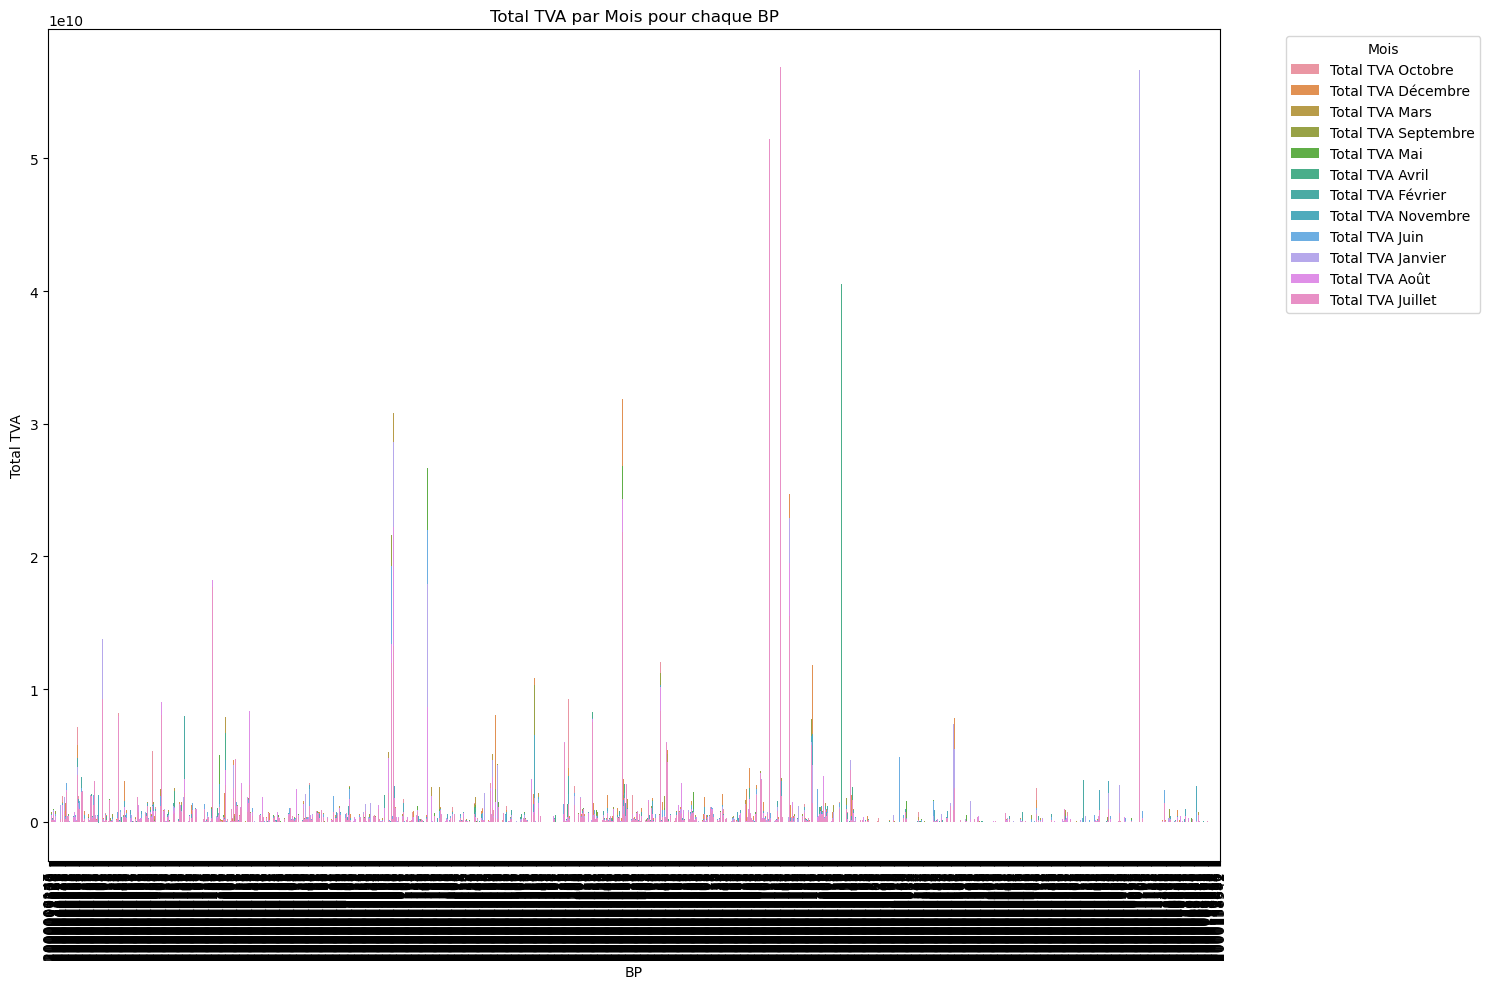

In [6]:


# Assurez-vous que votre DataFrame s'appelle 'jointure' et qu'il a été chargé correctement avec vos données
# Les colonnes doivent correspondre à celles du DataFrame que vous avez montré précédemment

# Créer un DataFrame agrégé pour calculer la somme de la TVA pour chaque mois et chaque BP
tva_mois_cols = ['Total TVA Janvier', 'Total TVA Février', 'Total TVA Mars', 'Total TVA Avril',
                 'Total TVA Mai', 'Total TVA Juin', 'Total TVA Juillet', 'Total TVA Août', 
                 'Total TVA Septembre', 'Total TVA Octobre', 'Total TVA Novembre', 'Total TVA Décembre']
jointure_melted = pd.melt(jointure, id_vars=['BP'], value_vars=tva_mois_cols, var_name='Mois', value_name='Total TVA')

# Trier les valeurs pour chaque BP par le total de la TVA dans un ordre décroissant
jointure_melted_sorted = jointure_melted.sort_values(['BP', 'Total TVA'], ascending=[True, False])

# Création d'un graphique à barres pour représenter le chiffre d'affaires par BP pour chaque mois
plt.figure(figsize=(15, 10))
sns.barplot(data=jointure_melted_sorted, x='BP', y='Total TVA', hue='Mois', dodge=False)
plt.title('Total TVA par Mois pour chaque BP')
plt.xlabel('BP')
plt.ylabel('Total TVA')
plt.xticks(rotation=90)
plt.legend(title='Mois', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


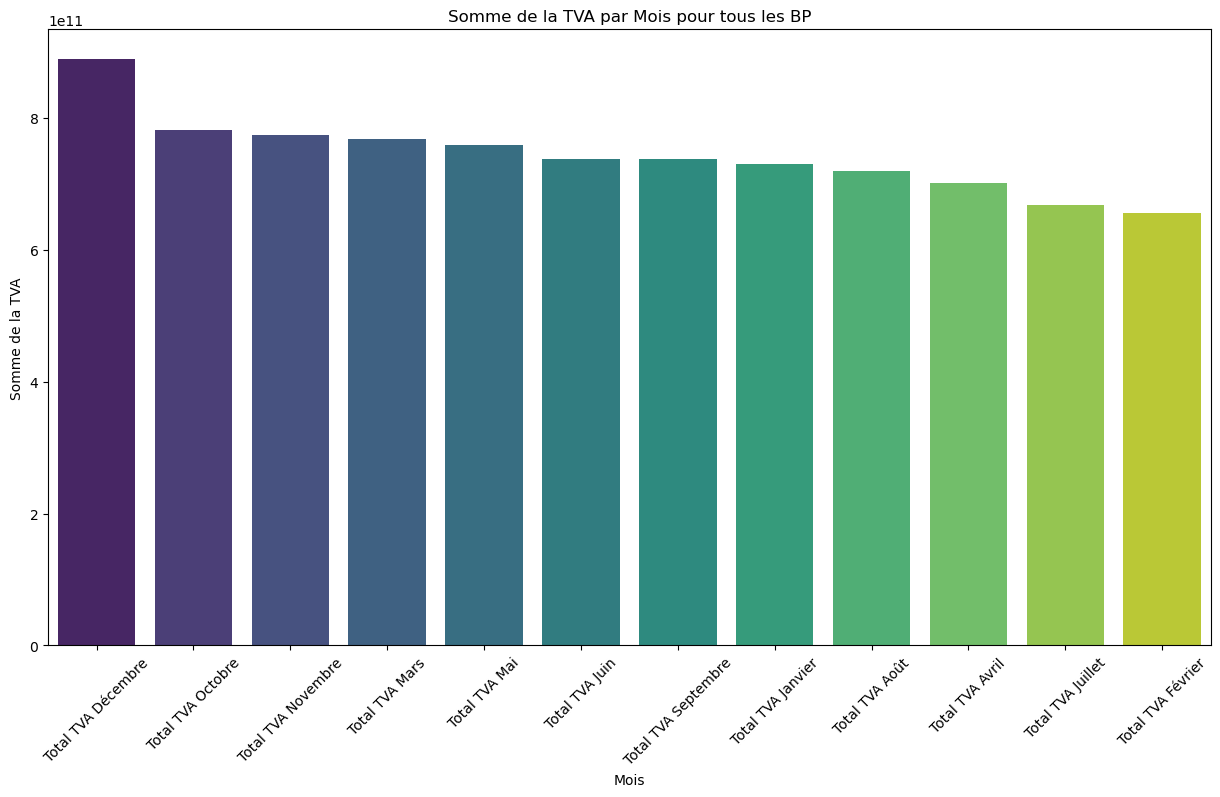

In [7]:
# Créer un DataFrame agrégé pour calculer la somme de la TVA pour chaque mois
monthly_tva_sums = jointure[tva_mois_cols].sum().sort_values(ascending=False)

# Création d'un graphique à barres pour représenter la somme de la TVA pour chaque mois
plt.figure(figsize=(15, 8))
sns.barplot(x=monthly_tva_sums.index, y=monthly_tva_sums.values, palette='viridis')
plt.title('Somme de la TVA par Mois pour tous les BP')
plt.xlabel('Mois')
plt.ylabel('Somme de la TVA')
plt.xticks(rotation=45)
plt.show()

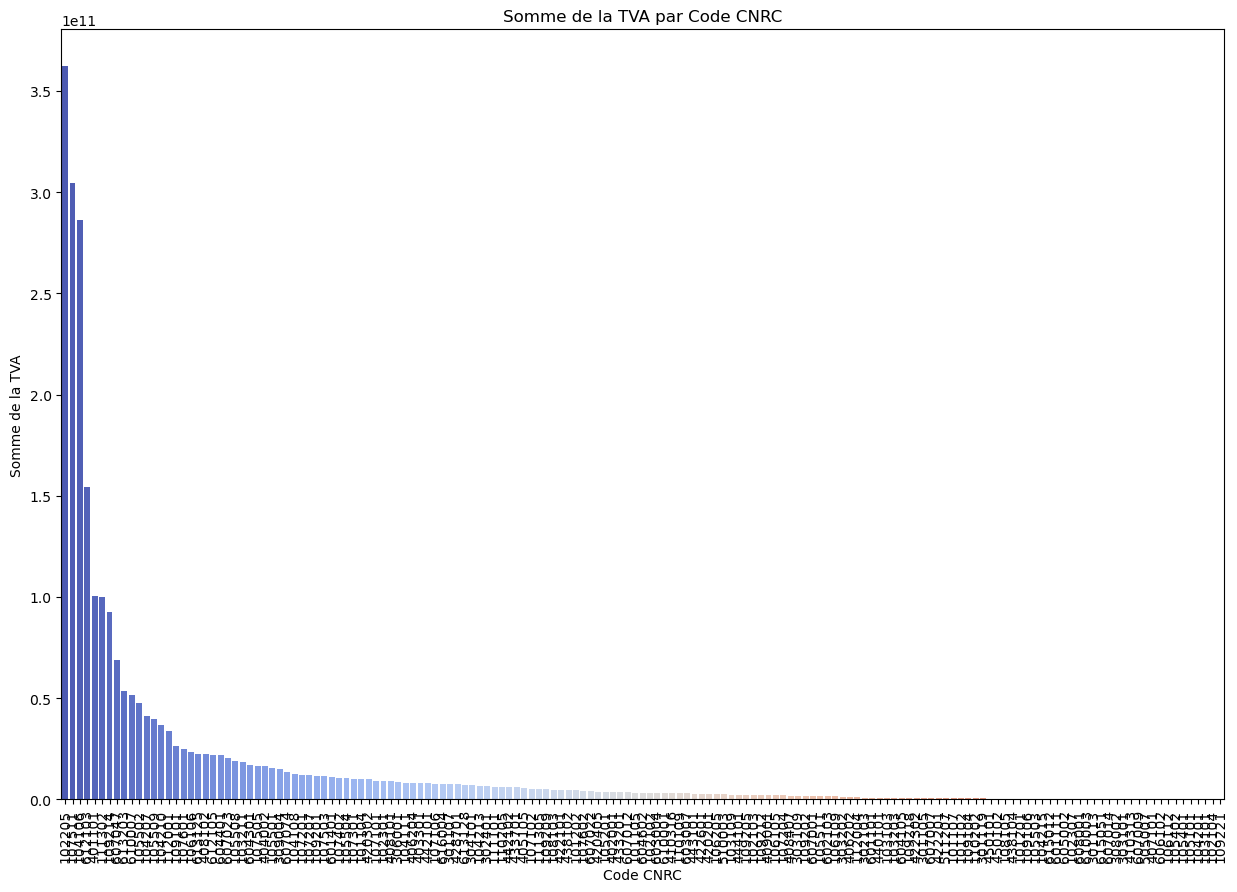

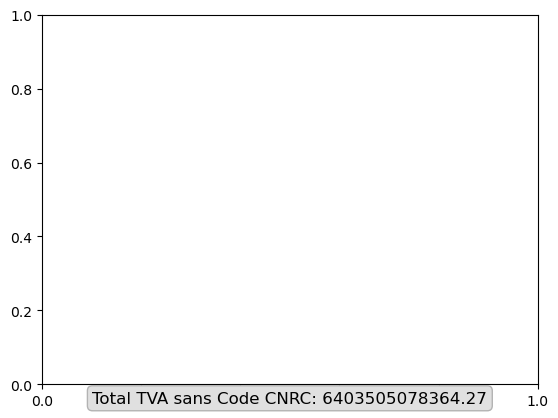

In [8]:


# Calculer la somme de la TVA pour chaque Code CNRC pour tous les mois
jointure['Total TVA'] = jointure[tva_mois_cols].sum(axis=1)
total_tva_par_cnrc = jointure.groupby('Code CNRC')['Total TVA'].sum().sort_values(ascending=False)

# Identifier les entrées où le Code CNRC n'est pas présent / est NaN
total_tva_sans_cnrc = total_tva_par_cnrc[total_tva_par_cnrc.index.isin(['/'])]

# Exclure les valeurs sans Code CNRC pour le graphique
total_tva_avec_cnrc = total_tva_par_cnrc[~total_tva_par_cnrc.index.isin(['/'])]

# Création d'un graphique à barres pour représenter la somme de la TVA par Code CNRC
plt.figure(figsize=(15, 10))
sns.barplot(x=total_tva_avec_cnrc.index, y=total_tva_avec_cnrc.values, palette='coolwarm', order=total_tva_avec_cnrc.index)
plt.title('Somme de la TVA par Code CNRC')
plt.xlabel('Code CNRC')
plt.ylabel('Somme de la TVA')
plt.xticks(rotation=90)  # Peut-être inutile si beaucoup de codes CNRC
plt.show()

# Si nécessaire, ajouter une annotation pour les entrées sans Code CNRC
if not total_tva_sans_cnrc.empty:
    plt.annotate('Total TVA sans Code CNRC: {:.2f}'.format(total_tva_sans_cnrc.values[0]),
                 xy=(0.5, -0.05), xycoords='axes fraction', ha='center',
                 fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor='#b3b3b3', facecolor='#e0e0e0'))


# AVEC LES TVA MENSUELLES EN MOINS

In [9]:
jointure = jointure.drop(columns = ['Total TVA Janvier',
      'Total TVA Février', 'Total TVA Mars', 'Total TVA Avril',
      'Total TVA Mai', 'Total TVA Juin', 'Total TVA Juillet',
      'Total TVA Août', 'Total TVA Septembre', 'Total TVA Octobre',
     'Total TVA Novembre', 'Total TVA Décembre',])

In [10]:
# Graphique 1: Nombre de fraudes par Code CNRC
fraude_count_cnrc = jointure[jointure['Fraude'] == 'fraude']['Code CNRC'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=fraude_count_cnrc.index, y=fraude_count_cnrc.values, palette='viridis')
plt.title('Nombre de Fraudes par Code CNRC')
plt.xlabel('Code CNRC')
plt.ylabel('Nombre de Fraudes')
plt.xticks(rotation=45)
plt.show()

KeyError: 'Fraude'

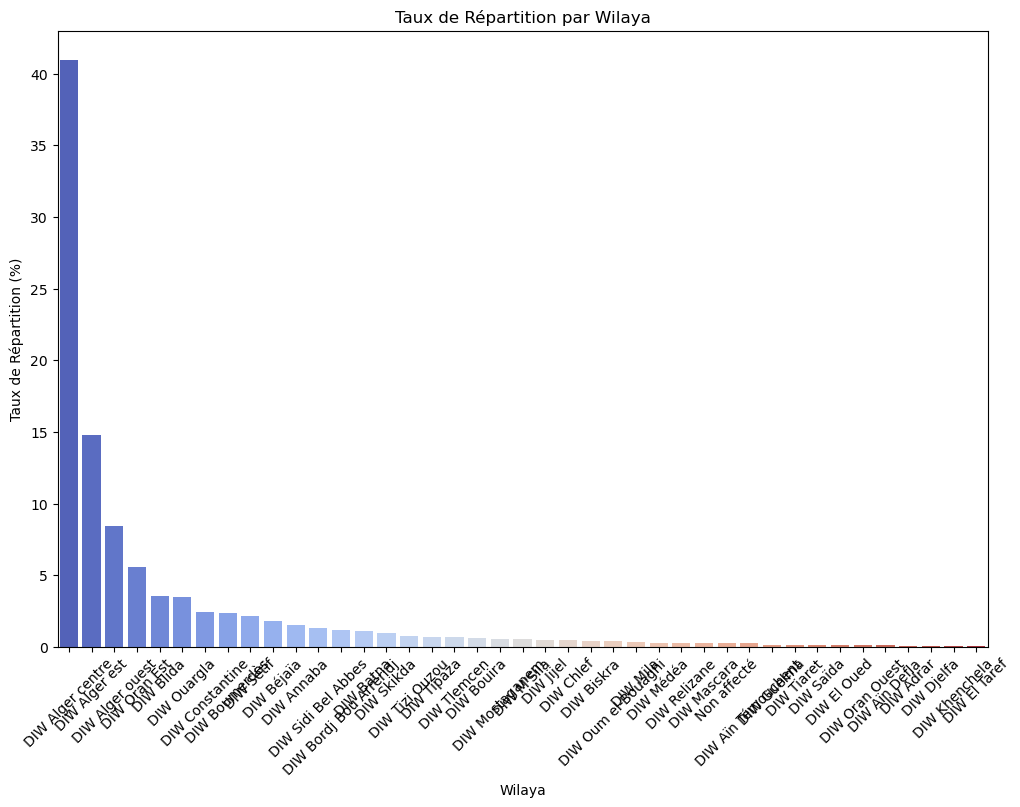

In [11]:
# Calcul du taux de répartition par Wilaya pour toutes les entrées (pas seulement les fraudes)
repartition_wilaya = jointure['Wilaya'].value_counts(normalize=True) * 100  # Converti en pourcentage

# Création d'un graphique à barres pour la répartition par Wilaya
plt.figure(figsize=(12, 8))
sns.barplot(x=repartition_wilaya.index, y=repartition_wilaya.values, palette='coolwarm')
plt.title('Taux de Répartition par Wilaya')
plt.xlabel('Wilaya')
plt.ylabel('Taux de Répartition (%)')
plt.xticks(rotation=45)
plt.show()

In [12]:
fraude_count_wilaya = jointure[jointure['Fraude'] == 'fraude']['Wilaya'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=fraude_count_wilaya.index, y=fraude_count_wilaya.values, palette='magma')
plt.title('Nombre de Fraudes par Wilaya')
plt.xlabel('Wilaya')
plt.ylabel('Nombre de Fraudes')
plt.xticks(rotation=45)
plt.show()

KeyError: 'Fraude'

In [14]:
# Graphique 3: Répartition des statuts (fraude, sus, bon)
status_counts = jointure['Fraude'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Répartition des Statuts')
plt.show()


KeyError: 'Fraude'

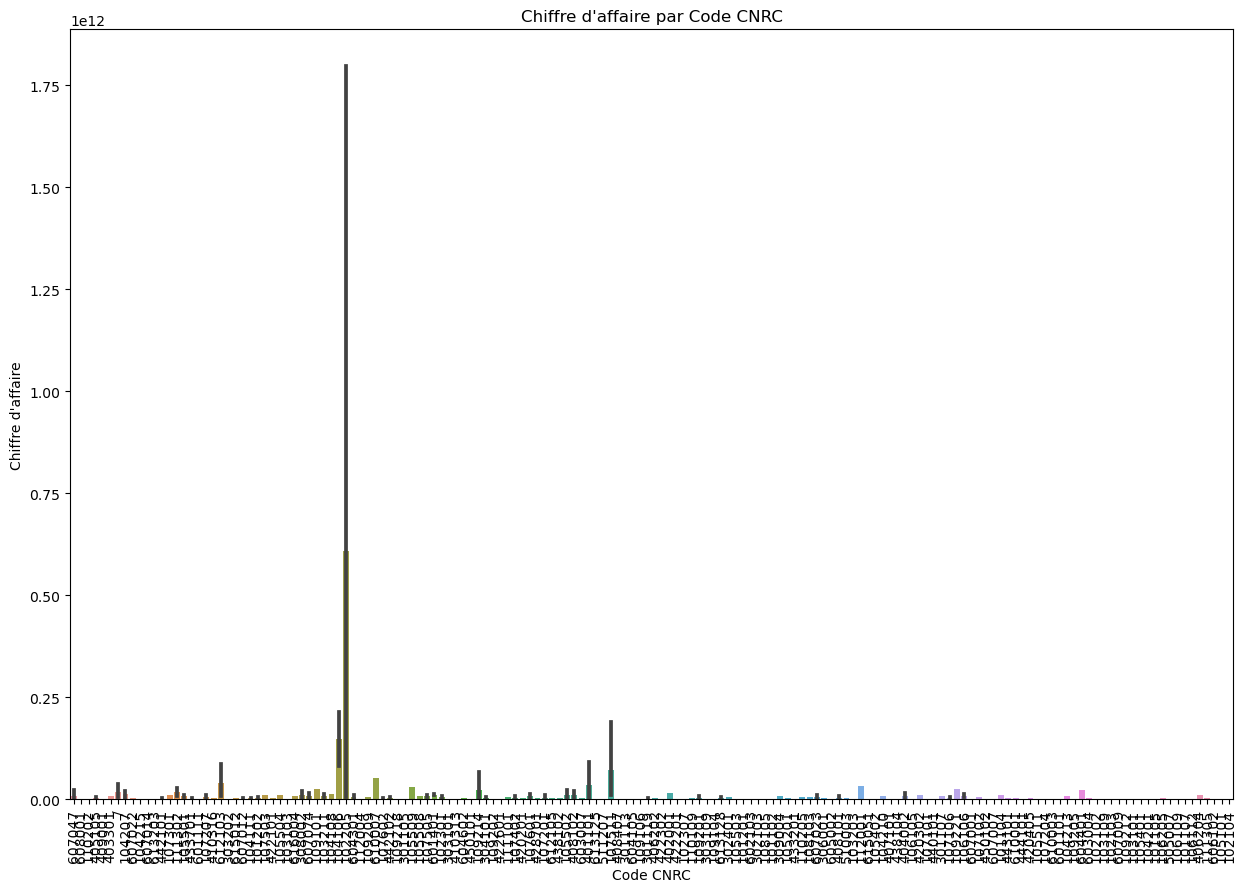

In [15]:
#Chiffre d'affaire par code CNRC :
plt.figure(figsize=(15, 10))
sns.barplot(data=jointure, x='Code CNRC', y='ChAff')
plt.title('Chiffre d\'affaire par Code CNRC')
plt.xlabel('Code CNRC')
plt.ylabel('Chiffre d\'affaire')
plt.xticks(rotation=90)  # Rotation des étiquettes pour une meilleure lisibilité
plt.show()


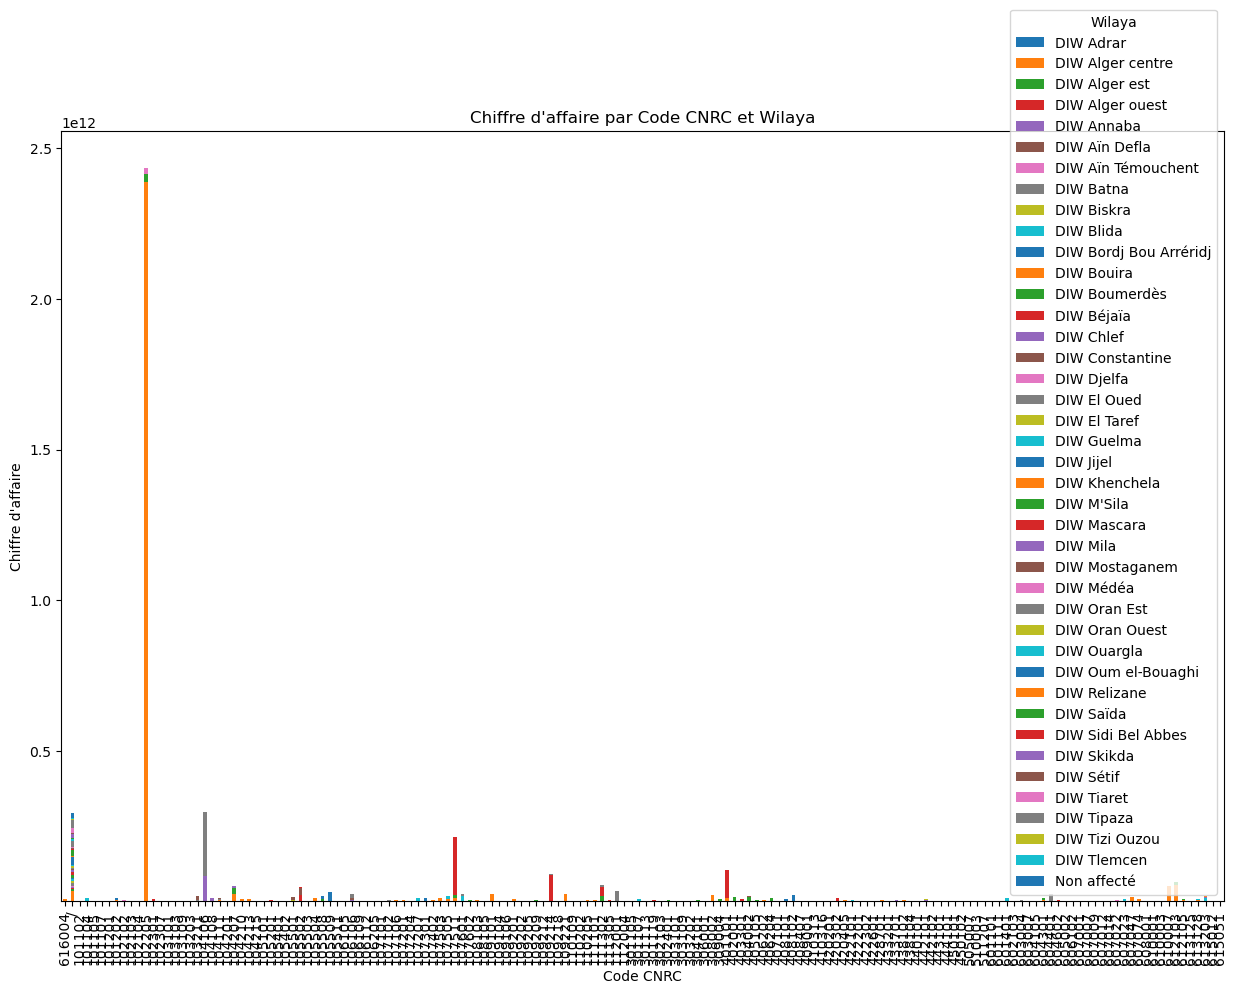

In [16]:
#Chiffre d'affaire par code CNRC et Wilaya :
# Création d'un pivot table pour le graphique à barres empilées
pivot_table = jointure.pivot_table(values='ChAff', index='Code CNRC', columns='Wilaya', fill_value=0)

pivot_table.plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title('Chiffre d\'affaire par Code CNRC et Wilaya')
plt.xlabel('Code CNRC')
plt.ylabel('Chiffre d\'affaire')
plt.xticks(rotation=90)  # Rotation des étiquettes pour une meilleure lisibilité
plt.show()


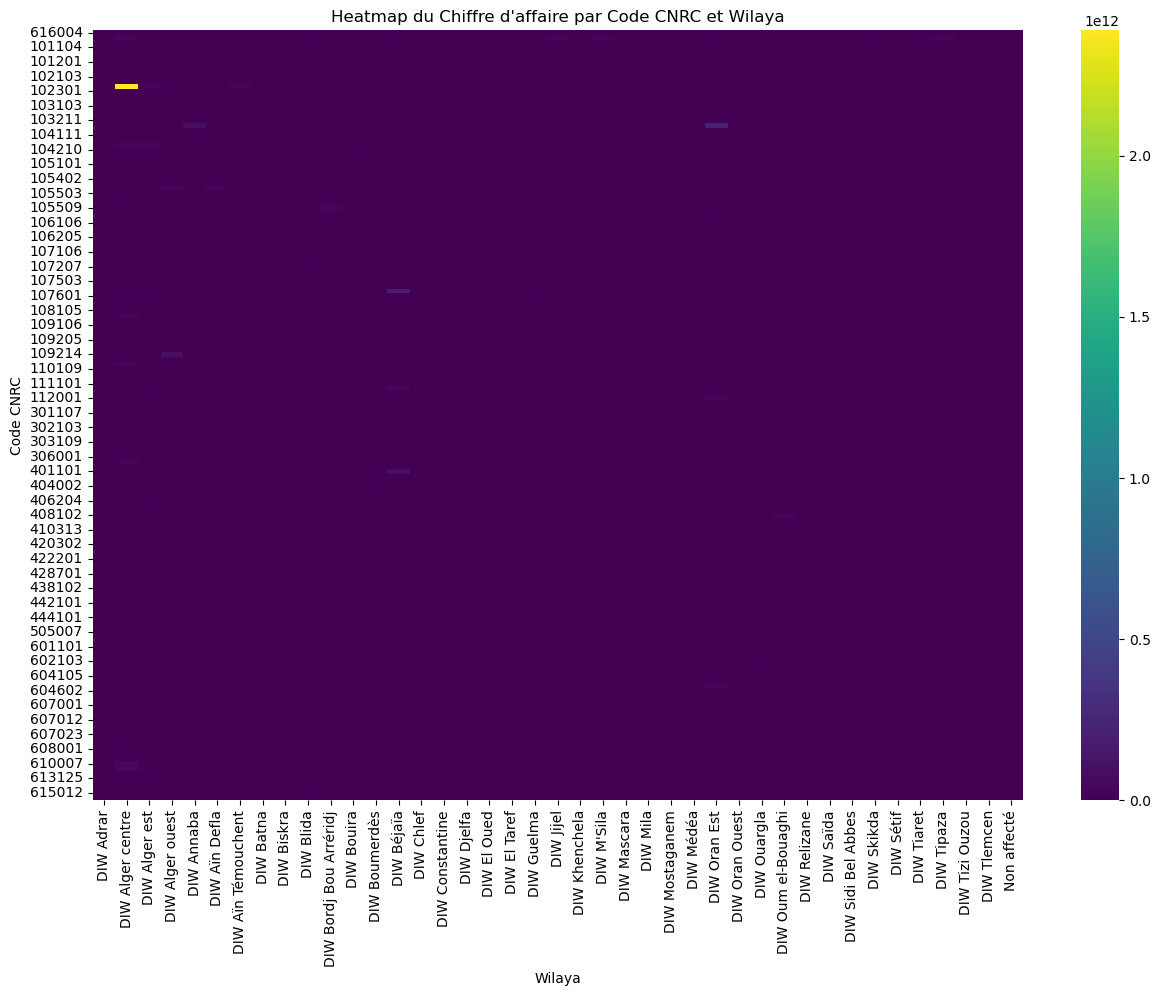

In [17]:
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_table, annot=False, cmap='viridis')  # `annot=True` pour afficher les valeurs
plt.title('Heatmap du Chiffre d\'affaire par Code CNRC et Wilaya')
plt.xlabel('Wilaya')
plt.ylabel('Code CNRC')
plt.show()


TypeError: 'value' must be an instance of str or bytes, not a int

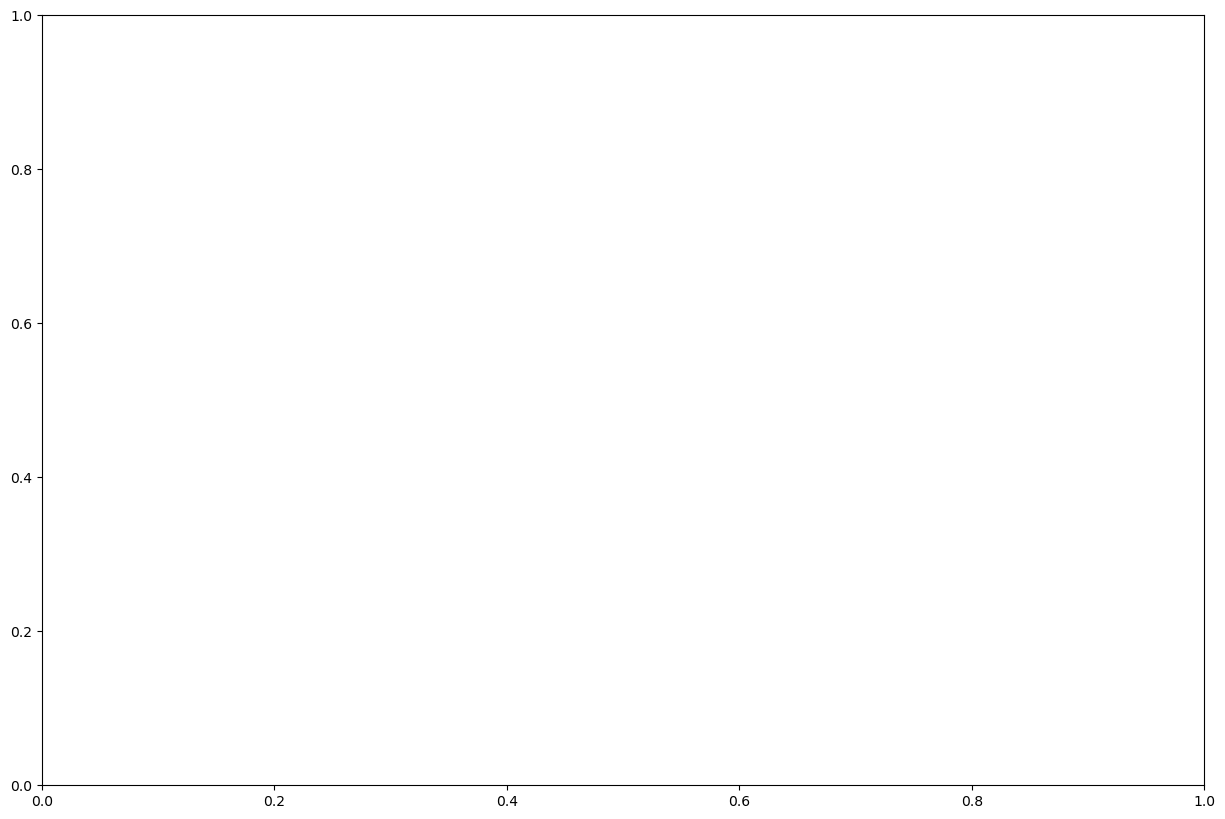

In [18]:
#Classification du chiffre d'affaire par rapport au code CNRC 

plt.figure(figsize=(15, 10))
sns.scatterplot(data=jointure, x='Code CNRC', y='ChAff', hue='Wilaya')
plt.title('Classification du Chiffre d\'affaire par Code CNRC')
plt.xlabel('Code CNRC')
plt.ylabel('Chiffre d\'affaire')
plt.xticks(rotation=90)  # Rotation des étiquettes pour une meilleure lisibilité
plt.legend(title='Wilaya', loc='upper right')
plt.show()


In [ ]:
number_of_frauds = (jointure['Fraude'] == 'fraude').sum()
print(number_of_frauds)

In [ ]:
fraud_rows = jointure[jointure['Fraude'] == 'fraude']
print(fraud_rows)


In [ ]:
#def normalize(column):
 #   min_value = min(column)
  #  max_value = max(column)
   # return (column - min_value) / (max_value - min_value)


In [ ]:
#def standardize(column):
 #   mean_value = column.mean()
  #  std_dev = column.std()
   # return (column - mean_value) / std_dev


In [ ]:
# Supposons que 'ChAff', 'Total TVA annuelle', et 'featureChT' sont les colonnes à normaliser/standardiser
#jointure['ChAff_normalized'] = normalize(jointure['ChAff'])
#jointure['Total_TVA_annuelle_normalized'] = normalize(jointure['Total TVA anuelle'])
#jointure['featureChT_standardized'] = standardize(jointure['featureChT'])


In [ ]:
jointure.info()

In [ ]:
jointure.describe()

In [ ]:
X1 = jointure.iloc[:,0:3]

In [ ]:
X2 = jointure.iloc[:,0:3]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaleStandard = StandardScaler()

In [ ]:
X1 = scaleStandard.fit_transform(X1)

In [ ]:
X1 = pd.DataFrame(X1,columns = ['ChAff', 'Total TVA anuelle', 'featureChT'] )

In [ ]:
X1

In [ ]:
X1.describe().round(3)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaleMinMax = MinMaxScaler(feature_range=(0,1))

In [ ]:
X2 = scaleMinMax.fit_transform(X2)

In [ ]:
X2 = pd.DataFrame(X2,columns = ['ChAff', 'Total TVA anuelle', 'featureChT'])

In [ ]:
X2.head()

In [ ]:
X2.describe().round(3)

In [ ]:
X1.describe().round(3)


def euclidien_distance(x1, x2):
    np
    


class KNN:
    def __init__(self, k=3)
    self.k = k
    
    def fit(self, X, y):
    self.X_train = X
    self.y_train = y
    
    def predict(self, X):
    prediction = [self._predict(x) for x in X]
    return prediction
    
    def _predict(self, x):
